In [86]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import sep

In [87]:
imgcls=fits.open('data/Redux/2025-09-28_20-50-54_sci_M39_I_exp180.00_0001_reduced.fits')[0].data
imggal=fits.open('data/Redux/2025-10-06_19-43-46_sci_NGC6946_I_exp600.00_0002_reduced.fits')[0].data




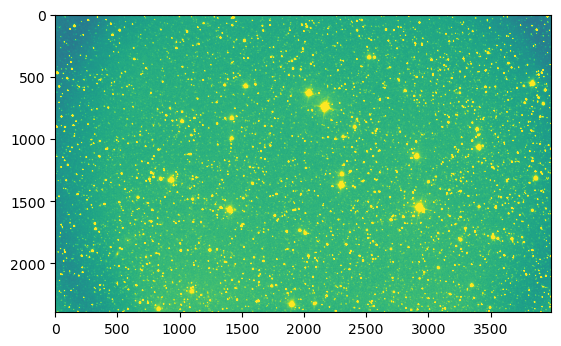

In [88]:
plt.imshow(imgcls,clim=[4,7])


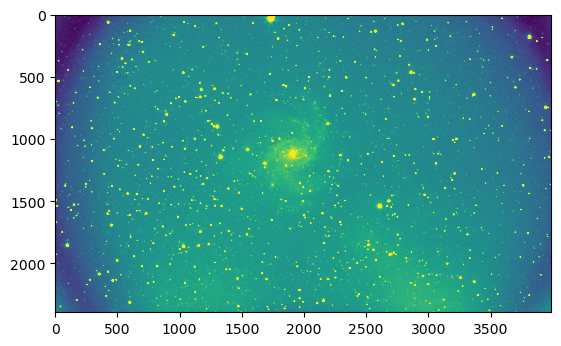

In [89]:
plt.imshow(imggal,clim=[9,11])


(array([ 0.,  0.,  0., ..., 76., 76., 47.]),
 array([ 4.        ,  4.00414365,  4.00828729, ...,  9.99171271,
         9.99585635, 10.        ]),
 <BarContainer object of 1448 artists>)

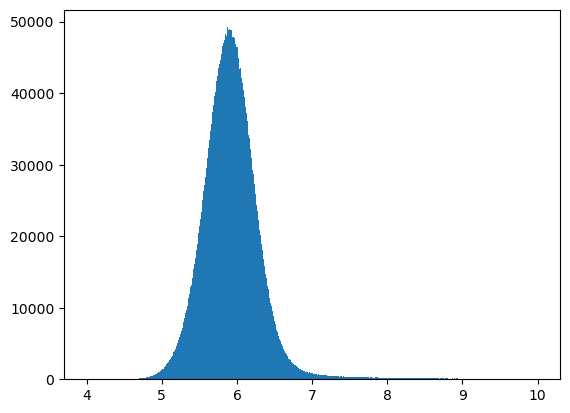

In [139]:
plt.hist(imgcls.flatten(),bins='auto',range=[4,10])

In [90]:
#run sep on star cluster
data=imgcls.copy()
data=data.astype(np.float32)
bkg = np.median(data) #sep.Background(data)
rms = np.std(data)
data_sub = data - bkg
objects, segmap = sep.extract(data_sub,0.05, err=rms,segmentation_map=True)
segmap[np.where(segmap>1)]=1
print(f'Found {len(objects)} objects')


Found 5976 objects


(array([ 0.,  0.,  0., ..., 12., 12., 11.]),
 array([-1.        , -0.99739176, -0.99478352, ...,  3.9947834 ,
         3.9973917 ,  4.        ]),
 <BarContainer object of 1917 artists>)

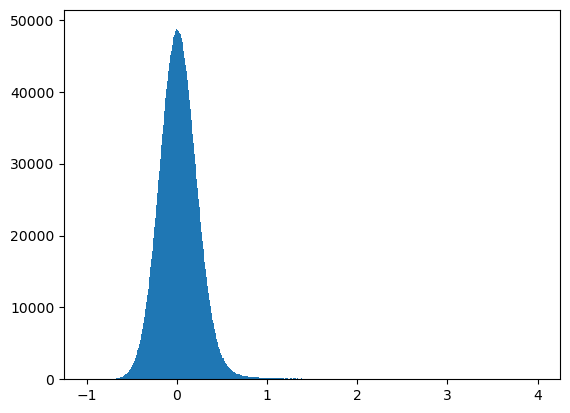

In [142]:
plt.hist(data_sub.flatten(),bins='auto',range=[-1,4])


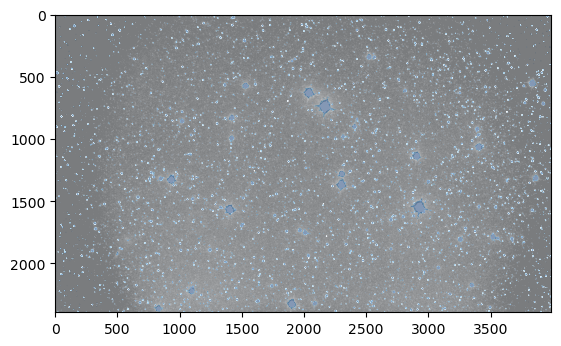

In [91]:
#display image with masked objects
import matplotlib.patches as patches
fig, ax = plt.subplots()
m = ax.imshow(data_sub, cmap='gray', clim=[-0.1,1])
p = ax.imshow(segmap, cmap='Blues', alpha=0.5)
plt.show()

In [92]:
#now estimate background with objects masked
bkg = sep.Background(data, mask=segmap, fw=12, fh=12)
bkg_img = bkg.back()
data_sub = data - bkg_img



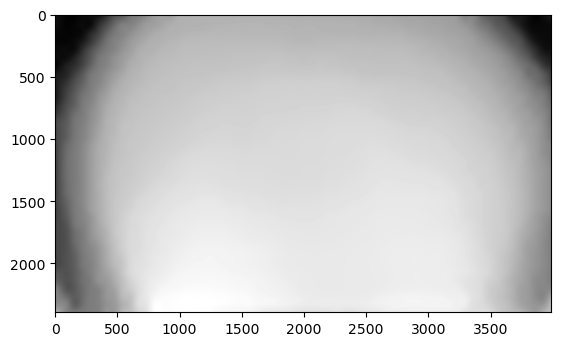

In [93]:
fig, ax = plt.subplots()
p = ax.imshow(bkg_img, cmap='gray')
plt.show()


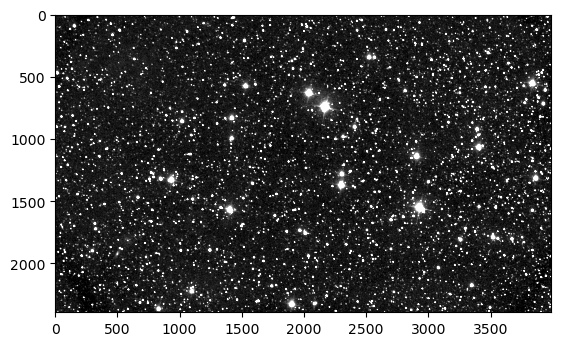

In [94]:
fig, ax = plt.subplots()
p = ax.imshow(data_sub, cmap='gray',clim=[-0.1,1])
plt.show()

In [95]:
#write background subtracted image
fits.writeto('cluster_i_bksub.fits',data_sub,overwrite=True)

In [133]:
#now tackle the harder case of galaxy
#run sep on star cluster
data=imggal.copy()
data=data.astype(np.float32)
bkg = np.median(data) #sep.Background(data)
rms = np.std(data)
data_sub = data - bkg
objects, segmap = sep.extract(data_sub,0.3, err=rms,segmentation_map=True)
segmap[np.where(segmap>1)]=1
print(f'Found {len(objects)} objects')

#now mask the galaxy as extra step to avoid oversubtraction
#find all pixels within a radius of the galaxy center
y,x = np.indices(data.shape)
center_y, center_x = 1121, 1911  # approximate center of NGC6946
radius = 500  # approximate radius of the galaxy
galaxy_mask = (x - center_x)**2 + (y - center_y)**2 < radius**2
#add to segmap
segmap[galaxy_mask] = 0



Found 1746 objects


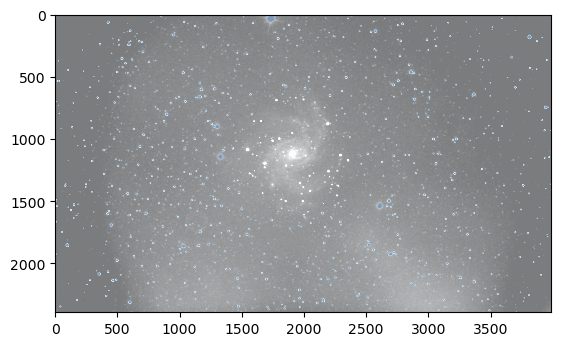

In [134]:
#display image with masked objects
import matplotlib.patches as patches
fig, ax = plt.subplots()
m = ax.imshow(data_sub, cmap='gray', clim=[-0.1,1])
p = ax.imshow(segmap, cmap='Blues', alpha=0.5)
plt.show()

In [135]:
#now estimate background with objects masked
bkg = sep.Background(data, mask=segmap, fw=12, fh=12)
bkg_img = bkg.back()
data_sub = data - bkg_img




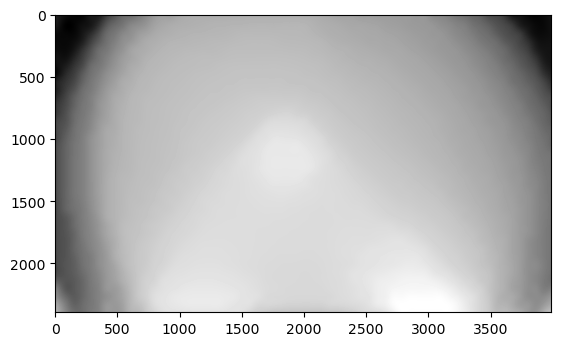

In [136]:
fig, ax = plt.subplots()
p = ax.imshow(bkg_img, cmap='gray')
plt.show()

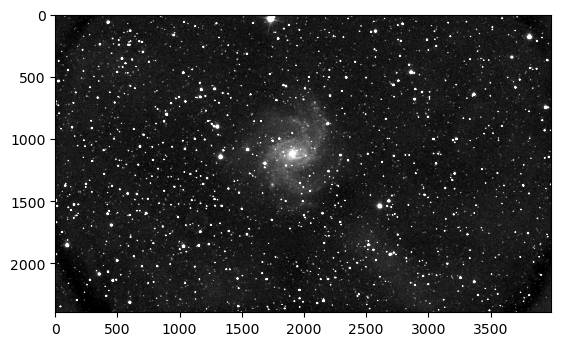

In [132]:
fig, ax = plt.subplots()
p = ax.imshow(data_sub, cmap='gray',clim=[-0.1,1])
plt.show()

In [125]:
#write background subtracted image
fits.writeto('galaxy_i_bksub.fits',data_sub,overwrite=True)